In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from processamento_de_dados.dados_reduzidos import dados_reduzidos

datasets = dados_reduzidos()

data_test_redu_df = datasets['data_test_redu_df']
data_train_redu_df = datasets['data_train_redu_df']

In [3]:
def digito_escolhido(digito, y_train):
    y_digito_escolhido = np.where(y_train == digito, 1, -1)
    
    return y_digito_escolhido

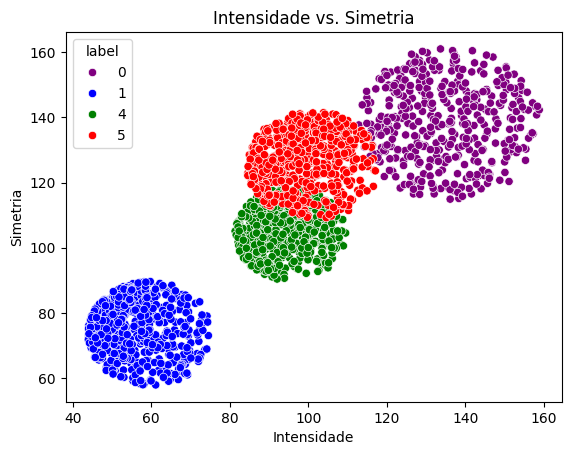

In [4]:
def plotagem_grafico_todos():
    sns.scatterplot(data_train_redu_df, x='intensidade', y='simetria', hue='label', palette={0: 'purple',
                    1: 'blue', 4: 'green', 5: 'red'})
    plt.title('Intensidade vs. Simetria')
    plt.xlabel('Intensidade')
    plt.ylabel('Simetria')

plotagem_grafico_todos()

In [5]:
X_train_original = data_train_redu_df.iloc[:, 1:].values
X_train_original = (X_train_original - np.mean(X_train_original, axis=0)) / np.std(X_train_original, axis=0)
y_train_original = data_train_redu_df.iloc[:, 0].values

X_test = data_test_redu_df[['intensidade', 'simetria']].values
X_test= (X_test - np.mean(X_test, axis=0)) / np.std(X_test, axis=0)
        
y_test = data_test_redu_df.iloc[:, 0].values

In [6]:
from modelos_lineares.perceptron import Perceptron
from modelos_lineares.regressao_linear import RegressaoLinear
from modelos_lineares.regressao_logistica import RegressaoLogistica

modelos = {
    "Perceptron": [],
    "Regressao_linear": [],
    "Regressao_logistica": []
} 

def get_modelo(nome_modelo):
    if nome_modelo == "Perceptron":
        return Perceptron(taxa_aprendizado=0.01, n_iteracoes=100)
    elif nome_modelo == "Regressao_linear":
        return RegressaoLinear(taxa_aprendizado=0.01, n_iteracoes=10000)
    elif nome_modelo == "Regressao_logistica":
        return RegressaoLogistica(taxa_aprendizado=0.001, n_iteracoes=1000)

100%|██████████| 100/100 [00:01<00:00, 60.78it/s]


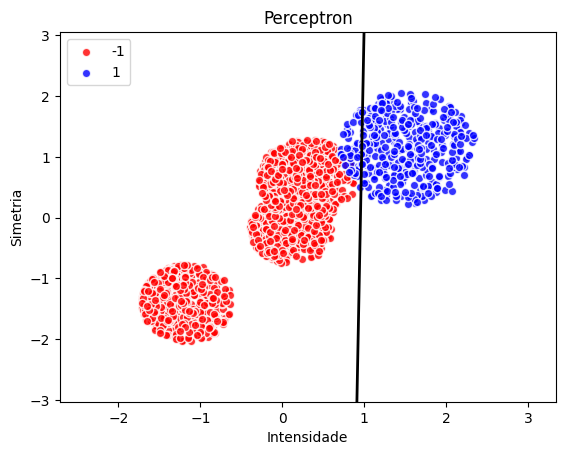

100%|██████████| 100/100 [00:01<00:00, 77.34it/s]


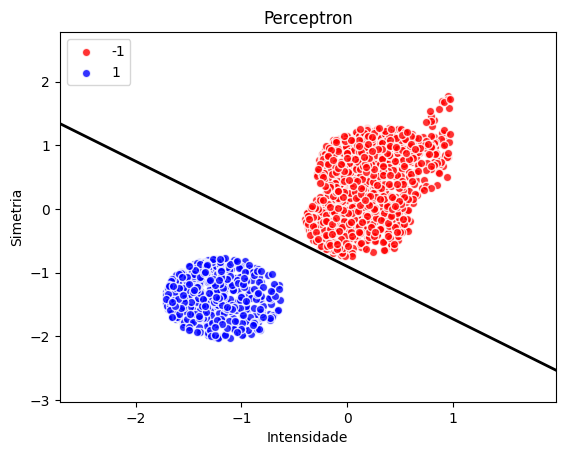

100%|██████████| 100/100 [00:00<00:00, 118.10it/s]


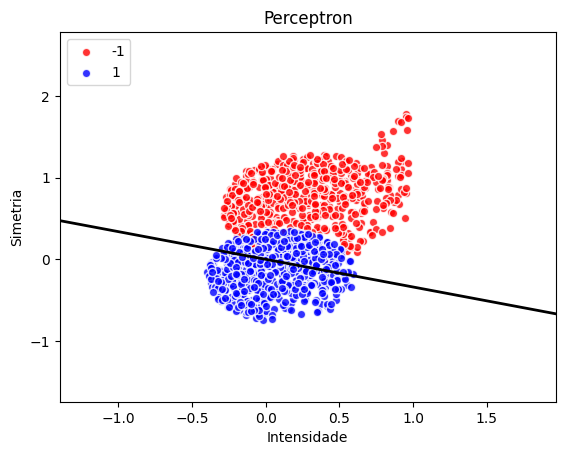

100%|██████████| 10000/10000 [00:00<00:00, 48445.38it/s]


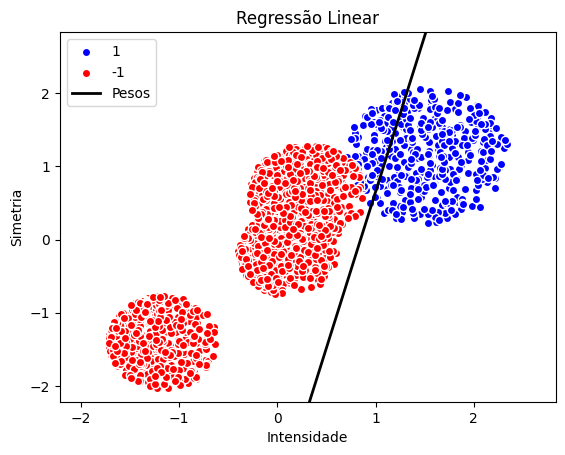

100%|██████████| 10000/10000 [00:00<00:00, 60098.41it/s]


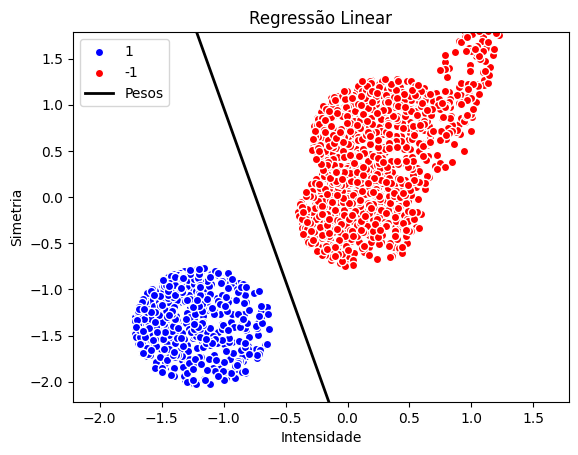

100%|██████████| 10000/10000 [00:00<00:00, 72804.00it/s]


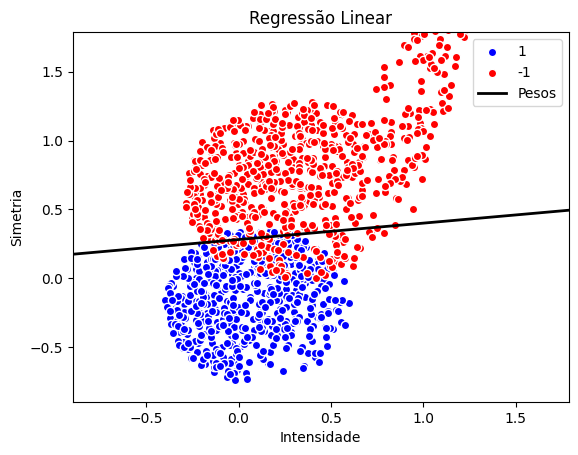

100%|██████████| 1000/1000 [00:00<00:00, 11528.04it/s]


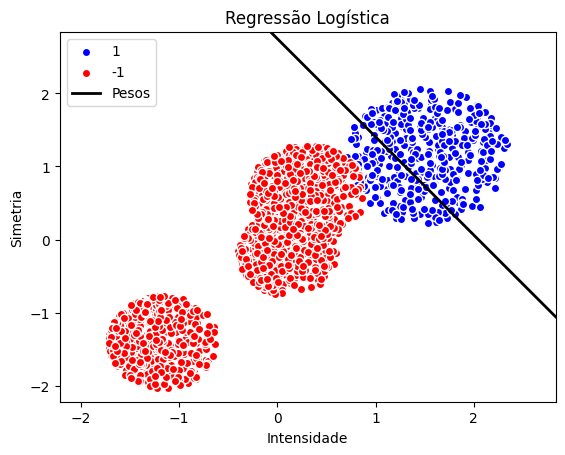

100%|██████████| 1000/1000 [00:00<00:00, 36924.29it/s]


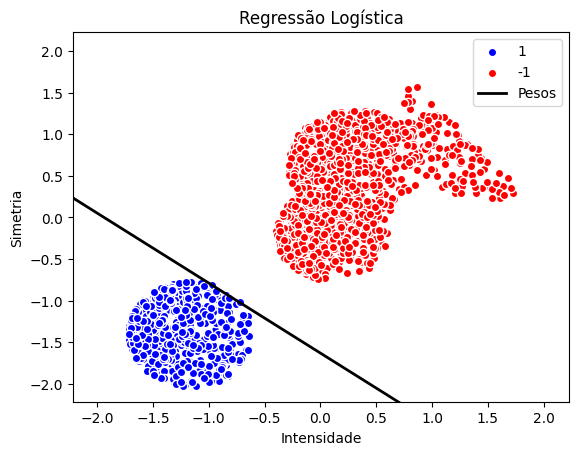

100%|██████████| 1000/1000 [00:00<00:00, 26243.27it/s]


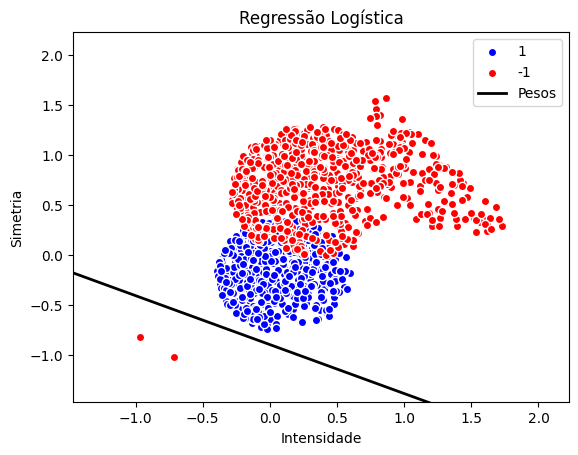

In [7]:
from utils.nomes_modelos import nomes_modelos

for nome_modelo in nomes_modelos:    
    X_train = X_train_original.copy()
    y_train = y_train_original.copy()
    
    for digito in (0, 1, 4):
        modelo = get_modelo(nome_modelo)
        
        y_digito_escolhido = digito_escolhido(digito, y_train)
        modelo.ajuste(X_train, y_digito_escolhido)
        modelo.plotar(X_train, y_digito_escolhido)
        
        y_previsao = modelo.prever(X_train)
        linhas_digito_a_ser_deletado = np.where(y_previsao == 1)[0]

        y_train = np.delete(y_train, linhas_digito_a_ser_deletado, axis=0)
        X_train = np.delete(X_train, linhas_digito_a_ser_deletado, axis=0)

        modelos[nome_modelo].append(modelo)

In [8]:
def obter_previsao(imagem):
    for index, digito in enumerate([0, 1, 4]):
        if modelos[nome_modelo][index].prever(imagem) == 1:
            return digito
        else:
            if digito == 4:
                return 5  

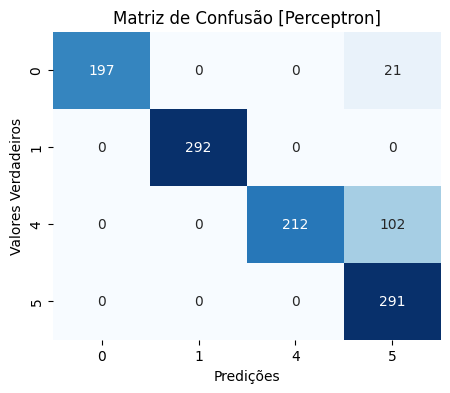

              precision    recall  f1-score   support

           0       1.00      0.90      0.95       218
           1       1.00      1.00      1.00       292
           4       1.00      0.68      0.81       314
           5       0.70      1.00      0.83       291

    accuracy                           0.89      1115
   macro avg       0.93      0.89      0.90      1115
weighted avg       0.92      0.89      0.89      1115



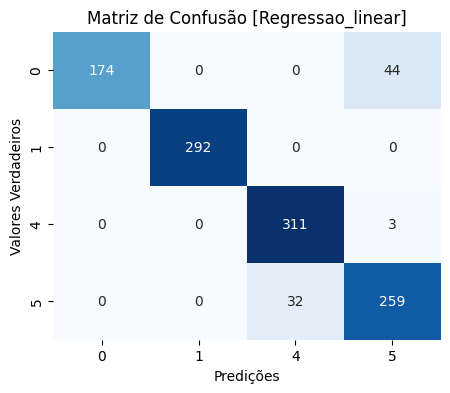

              precision    recall  f1-score   support

           0       1.00      0.80      0.89       218
           1       1.00      1.00      1.00       292
           4       0.91      0.99      0.95       314
           5       0.85      0.89      0.87       291

    accuracy                           0.93      1115
   macro avg       0.94      0.92      0.93      1115
weighted avg       0.93      0.93      0.93      1115



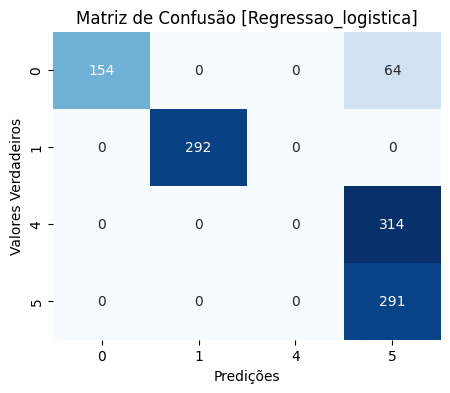

              precision    recall  f1-score   support

           0       1.00      0.71      0.83       218
           1       1.00      1.00      1.00       292
           4       0.00      0.00      0.00       314
           5       0.43      1.00      0.61       291

    accuracy                           0.66      1115
   macro avg       0.61      0.68      0.61      1115
weighted avg       0.57      0.66      0.58      1115



c:\Users\gabri\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gabri\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gabri\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [9]:
from processamento_de_dados.gerar_matriz_de_confusao import gerar_matriz_de_confusao
from processamento_de_dados.gerar_relatorio_de_classificacao import gerar_relatorio_classificacao

y_previsoes = []
        
for nome_modelo in nomes_modelos:             
    y_previsoes = [obter_previsao(imagem) for imagem in X_test]

    gerar_matriz_de_confusao(y_test, y_previsoes, modelo=nome_modelo)
    gerar_relatorio_classificacao(y_test, y_previsoes)